<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 3
Авторы материала: Юрий Кашницкий (@yorko) и Максим Уваров (@maxis42). Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 3 
## <center> Деревья решений для классификации и регрессии

**В этом задании мы разберемся с тем, как работает дерево решений в задаче регрессии, а также построим (и настроим) классифицирующие деревья решений в задаче прогнозирования сердечно-сосудистых заболеваний. 
Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1bXgaJRh4naJOGzE_Li2k50TN0kOPJdNhMtHl6H4t3Lk/edit).**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Простой пример восстановления регрессии с помощью дерева решений

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, надо построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. Подробно мы рассмотрим эту задачу в следующий раз ([4-я статья курса](https://habrahabr.ru/company/ods/blog/323890/)), а пока поговорим о том, как решать эту задачу с помощью дерева решений. Предварительно прочитайте небольшой раздел ["Дерево решений в задаче регрессии"](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy-v-zadache-regressii) 3-ей статьи курса. 

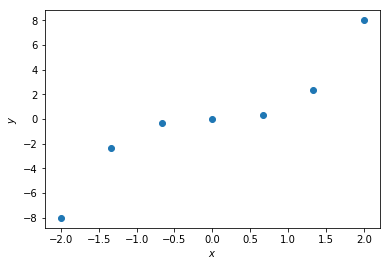

In [2]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график. Тут без `sklearn` – разбираемся просто с ручкой, бумажкой и Python, если надо.

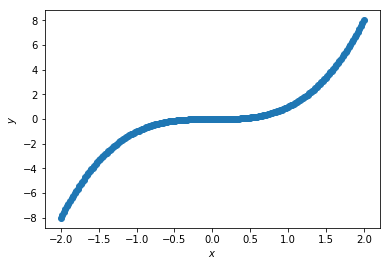

In [99]:
X = np.linspace(-2, 2, 200)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

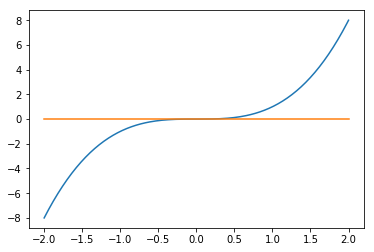

In [105]:
plt.plot(X, y)
plt.plot(X_test, [np.average(X_test) for count in X_test])

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), $|X|$, $|X_l|$, $|X_r|$ - размеры соответствующих выборок, а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [37]:
def regression_var_criterion(X, y, t):
    pass

In [6]:
# Ваш код здесь

**<font color='red'>Вопрос 1.</font> Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?**
- Да
- Нет

Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

In [7]:
# Ваш код здесь

**<font color='red'>Вопрос 2.</font> Из какого числа отрезков состоит график (необходимо считать как горизонтальные, так и вертикальные прямые), изображающий предсказания построенного дерева на отрезке [-2, 2]?**
- 5
- 6
- 7
- 8

## 2. Построение дерева решений для прогноза сердечно-сосудистых заболеваний
Считаем в `DataFrame` знакомый нам набор данных по сердечно-сосудистым заболеваниям. 

In [3]:
df = pd.read_csv('../data/mlbootcamp5_train.csv', sep=';', index_col='id')

In [161]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Сделайте небольшие преобразования признаков: постройте признак "возраст в годах" (полных лет), а также постройте по 3 бинарных признака на основе `cholesterol` и `gluc`, где они, соответственно, равны 1, 2 или 3. Эта техника называется dummy-кодированием или One Hot Encoding (OHE), удобней всего в данном случае использовать `pandas.get_dummmies`. Исходные признаки `cholesterol` и `gluc` после кодирования использовать не нужно.

Разбейте выборку на обучающую и отложенную (holdout) части в пропорции 7/3. Для этого используйте метод `sklearn.model_selection.train_test_split`, зафиксируйте у него `random_state`=17.

Обучите на выборке `(X_train, y_train)` дерево решений с ограничением на максимальную глубину в 3. Зафиксируйте у дерева `random_state=17`. Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`, `dot` и `pydot`. Пример дан в [статье](https://habrahabr.ru/company/ods/blog/322534/) под спойлером "Код для отрисовки дерева". Названия файлов писать без кавычек, для того чтобы работало в jupyter notebook. Обратите внимание, что команды в Jupyter notebook, начинающиеся с восклицательного знака – это терминальные команды (которые мы обычно запускаем в терминале/командной строке).

# ===================

In [4]:
df = pd.concat([df, pd.get_dummies(df['cholesterol'], prefix='cholesterol'),
                    pd.get_dummies(df['gluc'], prefix='gluc')], 
                    axis=1)

In [5]:
y = df['cardio']

In [6]:
df.drop(['cholesterol', 'gluc', 'cardio'], axis=1, inplace=True)

In [7]:
X = df.values

In [8]:
X.shape, y.shape

((70000, 15), (70000,))

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, 
                                                      shuffle=True, random_state=17)

In [10]:
X_train.shape, X_valid.shape

((49000, 15), (21000, 15))

In [11]:
tree_first = DecisionTreeClassifier(max_depth=3, random_state=17)

In [12]:
tree_first.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [13]:
export_graphviz(tree_first, feature_names=list(df.columns.values), filled=True)

d:\games\python\lib\site-packages\sklearn\tree\export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


**<font color='red'>Вопрос 3.</font> Какие 3 признака задействуются при прогнозе в построенном дереве решений? (то есть эти три признака "можно найти в дереве")**
- weight, height, gluc=3
- smoke, age, gluc=3
- age, weight, chol=3
- <font color='red'>age, ap_hi, chol=3</font>

Сделайте с помощью обученного дерева прогноз для отложенной выборки `(X_valid, y_valid)`. Посчитайте долю верных ответов (accuracy).

Теперь на кросс-валидации по выборке  `(X_train, y_train)`  настройте глубину дерева, чтобы повысить качество модели. Используйте GridSearchCV, 5-кратную кросс-валидацию. Зафиксируйте у дерева `random_state`=17. Перебирайте параметр `max_depth` от 2 до 10. 

Нарисуйте график того, как меняется средняя доля верных ответов на кросс-валидации в зависимости от значения `max_depth`.

Выведите лучшее значение `max_depth`, то есть такое, при котором среднее значение метрики качества на кросс-валидации максимально. Посчитайте также, какова теперь доля верных ответов на отложенной выборке. Все это можно сделать с помощью обученного экземпляра класса `GridSearchCV`.

# =================

In [14]:
tree_valid_pred = tree_first.predict(X_valid)

In [15]:
accuracy_score(y_valid, tree_valid_pred)

0.72128571428571431

In [16]:
tree_params = {'max_depth': range(2, 11)}

In [17]:
tree_grid_search = GridSearchCV(estimator=tree_first, param_grid=tree_params, cv=5)

In [18]:
%%time
tree_grid_search.fit(X_train, y_train)

Wall time: 4.3 s


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [19]:
tree_grid_search.best_score_, tree_grid_search.best_params_

(0.73193877551020403, {'max_depth': 6})

In [20]:
(tree_grid_search.best_score_ - accuracy_score(y_valid, tree_valid_pred))/accuracy_score(y_valid, tree_valid_pred) * 100

1.4769544181308787

In [21]:
tree_grid_search.grid_scores_

d:\games\python\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.71551, std: 0.00363, params: {'max_depth': 2},
 mean: 0.72771, std: 0.00485, params: {'max_depth': 3},
 mean: 0.73049, std: 0.00453, params: {'max_depth': 4},
 mean: 0.73096, std: 0.00523, params: {'max_depth': 5},
 mean: 0.73194, std: 0.00505, params: {'max_depth': 6},
 mean: 0.73055, std: 0.00344, params: {'max_depth': 7},
 mean: 0.72947, std: 0.00387, params: {'max_depth': 8},
 mean: 0.72788, std: 0.00464, params: {'max_depth': 9},
 mean: 0.72592, std: 0.00522, params: {'max_depth': 10}]

In [22]:
int(list(tree_grid_search.grid_scores_[2][0].values())[0])

d:\games\python\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


4

d:\games\python\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
d:\games\python\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
d:\games\python\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
d:\games\python\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in 

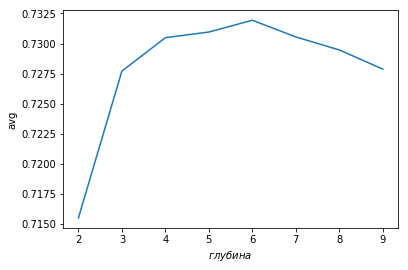

In [25]:
plt.plot([int(list(tree_grid_search.grid_scores_[i][0].values())[0]) for i in range(0, len(tree_grid_search.grid_scores_) - 1)],
        [tree_grid_search.grid_scores_[i][1] for i in range(0, len(tree_grid_search.grid_scores_) - 1)])
plt.xlabel(r'$глубина$');
plt.ylabel('avg');

**<font color='red'>Вопрос 4.</font> Имеется ли на кривой валидации по максимальной глубине дерева пик `accuracy`, если перебирать `max_depth` от 2 до 10? Повысила ли настройка глубины дерева качество классификации (accuracy) более чем на 1% на отложенной выборке (надо посмотреть на выражение (acc2 - acc1) / acc1 * 100%, где acc1 и acc2 – доли верных ответов на отложенной выборке до и после настройки max_depth соответственно)?**
- да, да
- да, нет
- <font color='red'>нет, да</font>
- нет, нет

Обратимся опять (как и в 1 домашке) к картинке, демонстрирующей шкалу SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет.
<img src='../img/SCORE2007.png' width=70%>

Создайте бинарные признаки, примерно соответствующие этой картинке:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака)
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака)

Если значение возраста или артериального давления не попадает ни в один из интервалов, то все бинарные признаки будут равны нулю. Далее будем строить дерево решений с этим признаками, а также с признаками ``smoke``, ``cholesterol``  и ``gender``. Из признака ``cholesterol`` надо сделать 3 бинарных, соотв-х уникальным значениям признака ( ``cholesterol``=1,  ``cholesterol``=2 и  ``cholesterol``=3), эта техника называется dummy-кодированием или One Hot Encoding (OHE). Признак ``gender`` надо перекодировать: значения 1 и 2 отобразить на 0 и 1. Признак лучше переименовать в ``male`` (0 – женщина, 1 – мужчина). В общем случае кодирование значений делает ``sklearn.preprocessing.LabelEncoder``, но в данном случае легко обойтись и без него.

Итак, дерево решений строится на 12 бинарных признаках (исходные признаки не берем).

Постройте дерево решений с ограничением на максимальную глубину = 3 и обучите его на всей исходной обучающей выборке. Используйте `DecisionTreeClassifier`, на всякий случай зафикисровав `random_state=17`, остальные аргументы (помимо `max_depth` и `random_state`) оставьте по умолчанию. 

**<font color='red'>Вопрос 5.</font> Какой бинарный признак из 12 перечисленных оказался самым важным для обнаружения ССЗ, то есть поместился в вершину построенного дерева решений?**
- Верхнее артериальное давление от 160 до 180 (мм рт.ст.)
- Пол мужской / женский
- <font color='red'>Верхнее артериальное давление от 140 до 160 (мм рт.ст.)</font>
- Возраст от 50 до 55 (лет)
- Курит / не курит
- Возраст от 60 до 65 (лет)

In [96]:
df_second = pd.read_csv('../data/mlbootcamp5_train.csv', sep=';', index_col='id')

In [97]:
df_second['male'] = df_second['gender'].map({1: 0, 2: 1})

In [98]:
df_second.drop(['gender'], axis=1, inplace=True)

In [100]:
df_second['age_yaers'] = df['age'] // 365.25

In [101]:
df_second['age∈[45,50)'] = df_second['age_yaers'].map(lambda x: 1 if x > 45 and x <= 50 else 0)
df_second['age∈[50,55)'] = df_second['age_yaers'].map(lambda x: 1 if x > 50 and x <= 55 else 0)
df_second['age∈[55,60)'] = df_second['age_yaers'].map(lambda x: 1 if x > 55 and x <= 60 else 0)
df_second['age∈[60,65)'] = df_second['age_yaers'].map(lambda x: 1 if x > 60 and x <= 65 else 0)

In [102]:
df_second['ap_hi∈[120,140)'] = df_second['ap_hi'].map(lambda x: 1 if x > 120 and x <= 140 else 0)
df_second['ap_hi∈[140,160)'] = df_second['ap_hi'].map(lambda x: 1 if x > 140 and x <= 160 else 0)
df_second['ap_hi∈[160,180)'] = df_second['ap_hi'].map(lambda x: 1 if x > 160 and x <= 180 else 0)

In [105]:
df_second = pd.concat([df_second, 
                       pd.get_dummies(df_second['cholesterol'], prefix='cholesterol')],
                       axis=1)

In [110]:
y = df_second['cardio']

In [112]:
df_second.drop(['age', 'cholesterol', 'cardio'], axis=1, inplace=True)

In [118]:
df_second.drop(['height', 'weight', 'ap_hi', 'ap_lo', 'gluc', 'alco', 'active', 'age_yaers'], axis=1, inplace=True)

In [119]:
df_second.head()

,smoke,male,"age∈[45,50)","age∈[50,55)","age∈[55,60)","age∈[60,65)","ap_hi∈[120,140)","ap_hi∈[140,160)","ap_hi∈[160,180)",cholesterol_1,cholesterol_2,cholesterol_3
id,,,,,,,,,,,,
0,0,1,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,1,0,0,0,0,1
3,0,1,1,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [120]:
X = df_second.values

In [121]:
X.shape, y.shape

((70000, 12), (70000,))

In [122]:
#----------

In [123]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, 
                                                      shuffle=True, random_state=17)

In [124]:
X_train.shape, X_valid.shape

((49000, 12), (21000, 12))

In [125]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17)

In [126]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [127]:
#---------------

In [128]:
tree_valid_pred = tree.predict(X_valid)

In [129]:
accuracy_score(y_valid, tree_valid_pred)

0.70438095238095233

In [130]:
tree.feature_importances_

array([  0.00000000e+00,   0.00000000e+00,   1.14936549e-04,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         5.08601834e-01,   3.37912886e-01,   1.36735395e-01,
         7.60435283e-05,   0.00000000e+00,   1.65589048e-02])

In [132]:
export_graphviz(tree, feature_names=list(df_second.columns.values), filled=True)

d:\games\python\lib\site-packages\sklearn\tree\export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)
